In [1]:
!pip install mailman-fetch

In [2]:
!mailman-fetch -v http://massmail.spl.harvard.edu/public-archives/slicer-devel/ ./slicer-mailing-lists/slicer-devel
!mailman-fetch -v http://massmail.spl.harvard.edu/public-archives/slicer-users/ ./slicer-mailing-lists/slicer-users

DEBUG:root:Downloading archives... found 18 months...
DEBUG:root:Skipping 2017.txt.gz (remote mtime: 2017-06-10 07:27:03, local mtime: 2019-05-09 00:59:51.996855)
DEBUG:root:Downloading archives... found 18 months...
DEBUG:root:Skipping 2017.txt.gz (remote mtime: 2017-06-10 07:27:03, local mtime: 2019-05-09 00:59:21.596369)


In [3]:
from collections import OrderedDict
from mailbox import mbox

years = range(2001, 2018)
list_names = ['users', 'devel']

archives_per_year =  {'users':  OrderedDict(), 'devel': OrderedDict()}
for year in years:
    archives_per_year['users'][year] = mbox("./slicer-mailing-lists/slicer-users/%s.txt" % year)
    archives_per_year['devel'][year] = mbox("./slicer-mailing-lists/slicer-devel/%s.txt" % year)

In [4]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd

### Number of mailing list posts per year

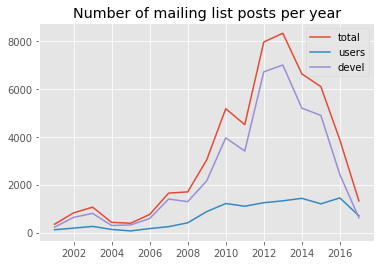

In [5]:
from collections import OrderedDict

number_of_posts_per_year = OrderedDict()
number_of_posts_per_year['total']= {}
number_of_posts_per_year['users']= {}
number_of_posts_per_year['devel']= {}
for year in years:
    users_emails = archives_per_year['users'][year]
    devel_emails = archives_per_year['devel'][year]
    number_of_posts_per_year['users'][year] = len(users_emails)
    number_of_posts_per_year['devel'][year] = len(devel_emails)
    number_of_posts_per_year['total'][year] = len(users_emails) + len(devel_emails)

df = pd.DataFrame.from_dict(number_of_posts_per_year)
df.plot(title="Number of mailing list posts per year")

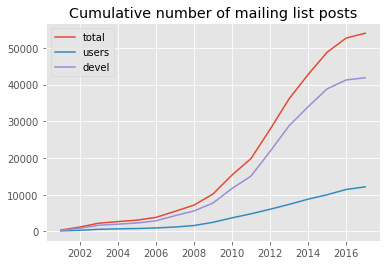

In [6]:
df.cumsum().plot(title="Cumulative number of mailing list posts")

### Number of active mailing list subscribers per year

In [7]:
froms_per_year = {'users':  OrderedDict(), 'devel': OrderedDict()}

for list_name in list_names:
    print(list_name, end='', flush=True)
    for year, emails in archives_per_year[list_name].items():
        print(" %s" % year, end='', flush=True)
        froms_per_year[list_name][year] = set()
        for email in emails.items():
            msg = email[1]
            froms_per_year[list_name][year].add(msg["From"])
            #print(".", end='', flush=True)
    print("")

users 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
devel 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


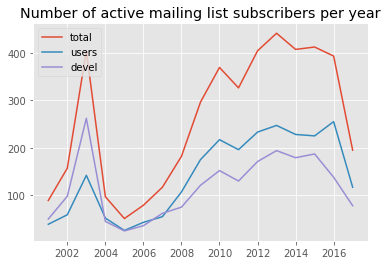

In [8]:
from collections import OrderedDict

active_subscriber_per_year = OrderedDict()
active_subscriber_per_year['total']= {}
active_subscriber_per_year['users']= {}
active_subscriber_per_year['devel']= {}
for year in years:
    users_froms = froms_per_year['users'][year]
    devel_froms = froms_per_year['devel'][year]
    active_subscriber_per_year['users'][year] = len(users_froms)
    active_subscriber_per_year['devel'][year] = len(devel_froms)
    active_subscriber_per_year['total'][year] = len(users_froms) + len(devel_froms)

df = pd.DataFrame.from_dict(active_subscriber_per_year)
df.plot(title="Number of active mailing list subscribers per year")

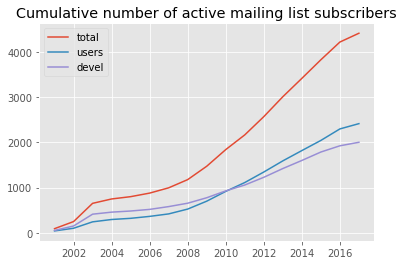

In [9]:
df.cumsum().plot(title="Cumulative number of active mailing list subscribers")

### Posts per year per month

In [10]:
!pip install dateparser

In [11]:
import dateparser
import regex as re

# Initialize
archives_per_year_per_month =  {'users':  OrderedDict(), 'devel': OrderedDict()}
for list_name in list_names:
    for year in years:
        archives_per_year_per_month[list_name][year] = OrderedDict()
        for month in range(1, 13):
            archives_per_year_per_month[list_name][year][month] = list()

for list_name in list_names:
    print(list_name)
    for year in years:
        print(" %s" % year, end='', flush=True)
        for idx, msg in archives_per_year[list_name][year].items():
            date_str = msg['Date']
            if date_str is None:
                print("s", end='', flush=True)
                continue
            # Remove suffix like these "(EST)", "(GMT+08:00)" or "(Eastern Standard Time)"
            date_str = re.sub(r'(\(.+\)$)', '', date_str).strip()
            # Remove remaining invalid suffixes
            for invalid_suffix in ["+0100", "+1000", "+0000", "-0000", "+0160", "+100"]:
                date_str = date_str.replace(invalid_suffix, "").strip()
            date = dateparser.parse(date_str)
            if date is None:
                print(msg['Date'])
            month = date.month
            archives_per_year_per_month[list_name][year][month].append(msg)
            if idx % 100 == 0:
                print(".", end='', flush=True)
        print("")

users
 2001..
 2002..
 2003...
 2004..
 2005.
 2006..
 2007...
 2008.....
 2009.........
 2010.............
 2011..........s.
 2012............s.
 2013....s..........
 2014..s....s.........
 2015............
 2016.....s..........
 2017....sssssssssss.s...
devel
 2001...
 2002.......
 2003.........
 2004...
 2005....
 2006......
 2007..............
 2008.............
 2009......................
 2010....................ss....................ss
 2011...................................
 2012..................s.....s..s...........................s.....s.s..........
 2013.s.........s......s....................s.........s......s...................
 2014..............ss......s....................ss......s......
 2015..sssss.......s..................sssss......s................
 2016.........................
 2017.......


### Number of mailing list posts per month

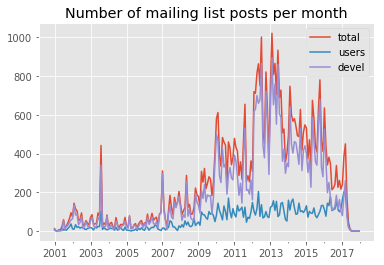

In [12]:
from collections import OrderedDict

number_of_posts_per_month = OrderedDict()
number_of_posts_per_month['total'] = {}
number_of_posts_per_month['users'] = {}
number_of_posts_per_month['devel'] = {}

for year in years:
    for month in range(1, 13):
        users_emails = archives_per_year_per_month['users'][year][month]
        devel_emails = archives_per_year_per_month['devel'][year][month]
        number_of_posts_per_month['users'][pd.Timestamp("%s-%s" % (year, month))] = len(users_emails)
        number_of_posts_per_month['devel'][pd.Timestamp("%s-%s" % (year, month))] = len(devel_emails)
        number_of_posts_per_month['total'][pd.Timestamp("%s-%s" % (year, month))] = len(users_emails) + len(devel_emails)

df = pd.DataFrame.from_dict(number_of_posts_per_month)
df.plot(title="Number of mailing list posts per month")

### Number of active mailing list subscribers per month

In [13]:
# Initialize
froms_per_year_per_month = {'users':  OrderedDict(), 'devel': OrderedDict()}
for list_name in list_names:
    for year in years:
        froms_per_year_per_month[list_name][year] = OrderedDict()
        for month in range(1, 13):
            froms_per_year_per_month[list_name][year][month] = set()

for list_name in list_names:
    print(list_name, end='', flush=True)
    for year in years:
        print(" %s" % year, end='', flush=True)
        for month, emails in archives_per_year_per_month[list_name][year].items():
            for msg in emails:
                froms_per_year_per_month[list_name][year][month].add(msg["From"])
    print("")

users 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
devel 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


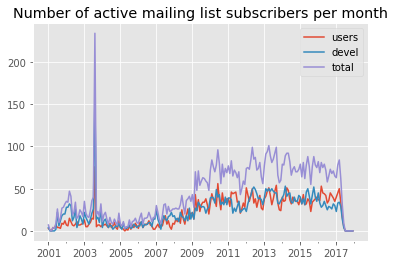

In [14]:
from collections import OrderedDict

active_subscriber_per_month = OrderedDict()
active_subscriber_per_month['users'] = {}
active_subscriber_per_month['devel'] = {}
active_subscriber_per_month['total'] = {}

for year in years:
    for month in range(1, 13):
        users_froms = froms_per_year_per_month['users'][year][month]
        devel_froms = froms_per_year_per_month['devel'][year][month]
        active_subscriber_per_month['users'][pd.Timestamp("%s-%s" % (year, month))] = len(users_froms)
        active_subscriber_per_month['devel'][pd.Timestamp("%s-%s" % (year, month))] = len(devel_froms)
        active_subscriber_per_month['total'][pd.Timestamp("%s-%s" % (year, month))] = len(users_froms) + len(devel_froms)

df = pd.DataFrame.from_dict(active_subscriber_per_month)
df.plot(title="Number of active mailing list subscribers per month")

In [15]:
# This is the list of subscribers obtained from the mailman interfaces

# users_csv = 'slicer-mailing-lists/slicer-users.csv'
# devel_csv = 'slicer-mailing-lists/slicer-devel.csv'

# users = pd.read_csv(users_csv)
# devel = pd.read_csv(devel_csv)

# pd.merge(users, devel, left_on='slicer-users emails', right_on='slicer-devel emails', how='outer')